# Tesla, Inc. (TSLA) Financials

This project aims to conduct a thorough financial analysis of Tesla, a leading electric vehicle manufacturer. The analysis starts by utilizing the Yfinance Library to import financial data and conducting basic price analysis. The primary focus is on examining the company's financial statements, including the balance sheet, income statements, and cashflow statements.

By analyzing these financial statements, the project aims to provide insight into Tesla's profitability, liquidity, and solvency. Profitability analysis will help determine the company's ability to generate profits, whereas liquidity analysis will help assess the company's ability to meet its short-term financial obligations. Solvency analysis will aid in determining the company's ability to pay off its long-term debts.

This analysis is essential for investors as it allows them to evaluate a company's financial health and identify potential risks. In addition, the project uses predictive modeling techniques to predict Tesla's future financial performance based on historical data. These techniques help identify trends and patterns in Tesla's financial data, allowing for informed decision-making by investors.

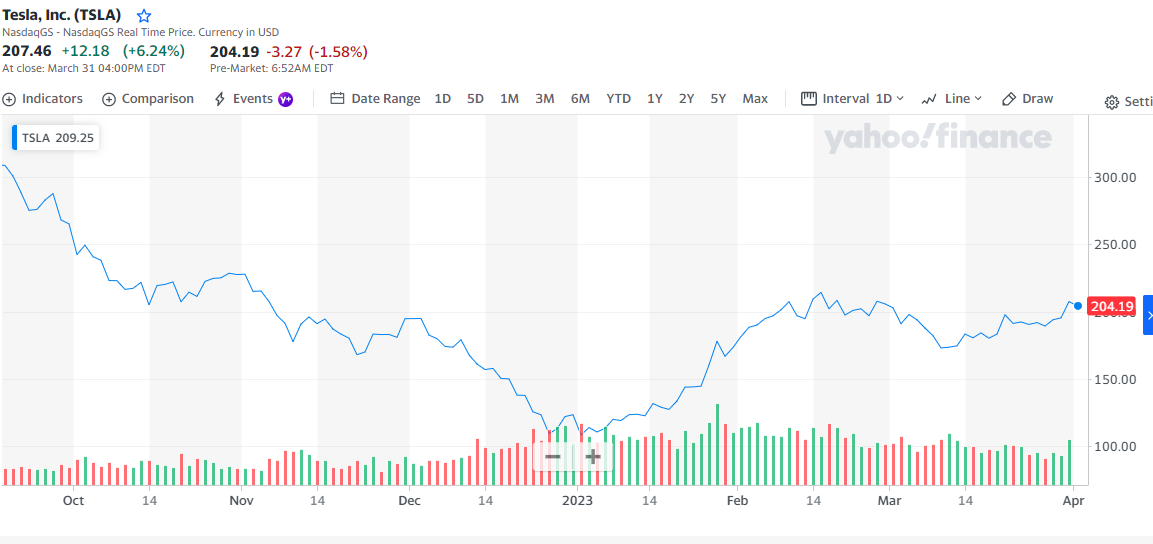

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [36]:
from matplotlib import ticker 

In [20]:
import numpy_financial as npf
import yfinance as yf

In [12]:
import warnings

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from datetime import datetime

In [17]:
class Stock:
    def __init__(self, ticker):
        self.ticker = ticker
    def get_stock(self, ticker):
        stock = yf.Ticker(ticker).history(period = "Max")
        return stock

In [21]:
tsla = Stock("TSLA").get_stock("TSLA")

In [22]:
tsla.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-27 00:00:00-04:00,194.419998,197.389999,189.940002,191.809998,120851600,0.0,0.0
2023-03-28 00:00:00-04:00,192.000000,192.350006,185.429993,189.190002,98654600,0.0,0.0
2023-03-29 00:00:00-04:00,193.130005,195.289993,189.440002,193.880005,123660000,0.0,0.0
2023-03-30 00:00:00-04:00,195.580002,197.330002,194.419998,195.279999,110252200,0.0,0.0
2023-03-31 00:00:00-04:00,197.529999,207.789993,197.199997,207.460007,169638500,0.0,0.0


In [23]:
x = tsla.index

In [24]:
y = tsla.Close

In [28]:
"""In Python, "plt.subplots()" is a method from the "matplotlib.pyplot" module that creates a new figure object and one or more 
subplots within that figure.
The method takes several parameters, including the number of rows and columns of subplots to create, the size of the figure, 
and other options related to the spacing and layout of the subplots.
The syntax "fig, ax = plt.subplots(figsize=(12, 6))" creates a new figure object with a single subplot, and assigns the figure 
object to the variable "fig" and the subplot object to the variable "ax".
The "figsize" parameter sets the size of the figure to 12 inches in width and 6 inches in height, which can be adjusted to fit 
the desired aspect ratio and resolution for the plot. The resulting figure and subplot can be customized further using other methods 
and properties provided by the "Figure" and "Axes" classes.""" 

"""In Python, "plt.gca()" is a method from the "matplotlib.pyplot" module that gets the current axes instance of the current figure. This method is often used to modify the properties of the plot axes, such as the tick labels, axis limits, and gridlines.

In the line of code "plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))", the ".yaxis" attribute of the current axes instance is accessed to set the major tick formatter to a custom function.

The "FuncFormatter" function from the "matplotlib.ticker" module is used to format the tick values on the y-axis of the plot. The "FuncFormatter" function takes a user-defined function as its argument, which is applied to the tick values to format them according to a specific format string.

The lambda function used in this code snippet takes two arguments: "x" and "". The "x" argument represents the tick value, while the "" argument is a placeholder that is not used in the formatting function. The lambda function formats the tick value as a string with no decimal places using the "{:.0f}" format string. This means that tick values will be displayed as whole numbers without any decimal places.

Overall, this line of code is used to customize the formatting of the tick labels on the y-axis of the plot. It sets the major tick formatter to a custom function that formats the tick values as whole numbers without decimal places."""


'In Python, "plt.gca()" is a method from the "matplotlib.pyplot" module that gets the current axes instance of the current figure. This method is often used to modify the properties of the plot axes, such as the tick labels, axis limits, and gridlines.\n\nIn the line of code "plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: \'{:.0f}\'.format(x)))", the ".yaxis" attribute of the current axes instance is accessed to set the major tick formatter to a custom function.\n\nThe "FuncFormatter" function from the "matplotlib.ticker" module is used to format the tick values on the y-axis of the plot. The "FuncFormatter" function takes a user-defined function as its argument, which is applied to the tick values to format them according to a specific format string.\n\nThe lambda function used in this code snippet takes two arguments: "x" and "". The "x" argument represents the tick value, while the "" argument is a placeholder that is not used in the formatting function. The lambda f

In [57]:
#Plot class will plot graph through taking two argument x and y
#These instance variables represent the data that will be plotted on the line plot.

class Plot:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def line_plot(self, x, y):
        from matplotlib.ticker import FuncFormatter
        plt.style.use('dark_background')
        fig, ax = plt.subplots(figsize=(15, 8))
        plt.plot(x, y, color = "goldenrod", alpha = 0.9)
        plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
        ax.grid(color="orange", alpha = 0.20)
        plt.show()
        
    def bar_plot(self, x, y):
        from matplotlib.ticker import FuncFormatter
        plt.style.use("dark_baground")
        fig, ax = plt.subplots(figsize = (15, 8))
        plt.plot(x, y, color = "goldenrod", alpha = 0.9)
        plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
        ax.grid(color='white', alpha=0.20)
        plt.show()

# Close price and Volume for the entire year


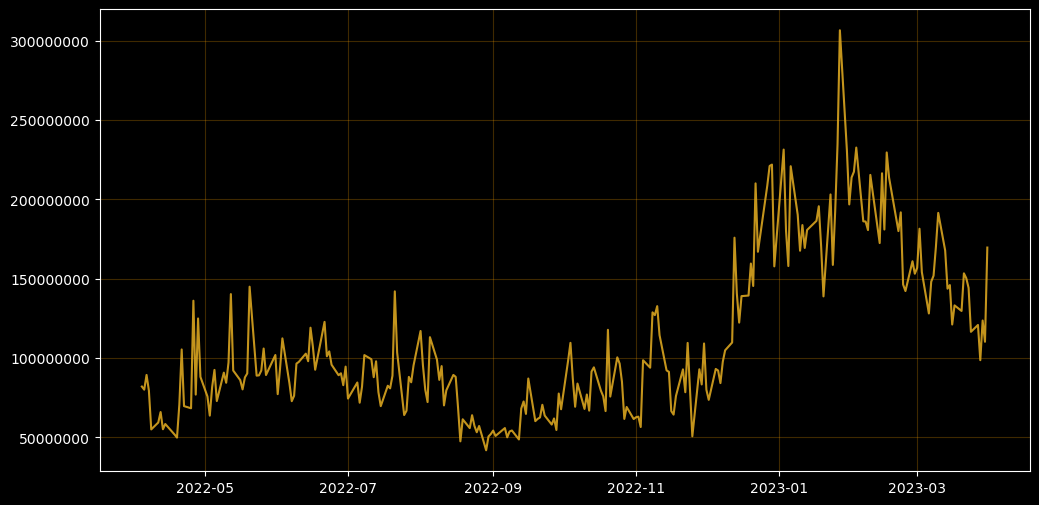

In [53]:
import yfinance as yf

tsla = yf.Ticker("TSLA")
tsla_data = tsla.history(start='2022-04-03', end='2023-04-03')
my_plot = Plot(x=tsla_data.index, y=tsla_data['Volume']).line_plot(x=tsla_data.index, y=tsla_data['Volume'])


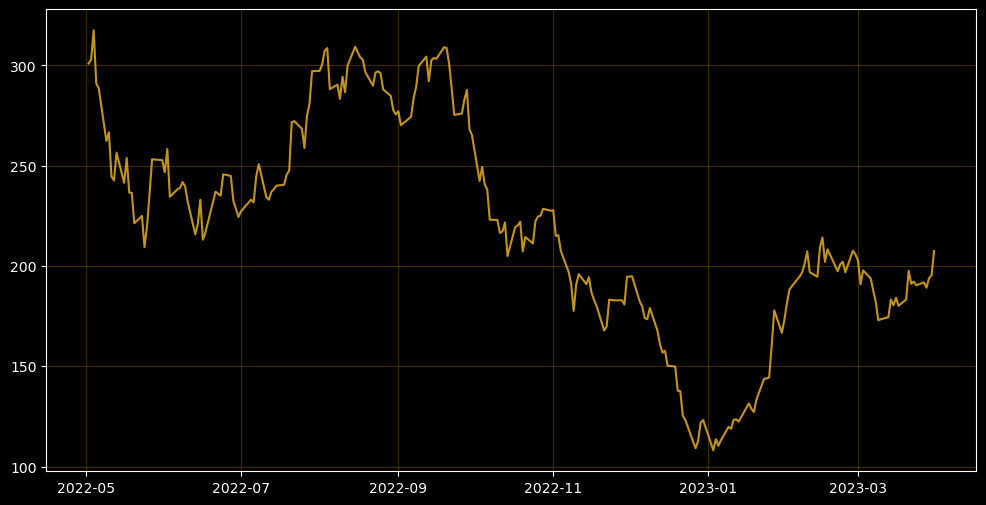

In [54]:
plot = Plot(close_prices.index, close_prices)
plot.line_plot(close_prices.index, close_prices)



# Calculating Moving Averages

In [59]:
class StockMovingAverageShort:
    def __innit__(self, ticker):
        self.ticker = ticker
    def moving_average(self, ticker):
        stock = yf.Ticker(ticker).history(period="max")
        
            

In [60]:
import yfinance as yf
import pandas as pd
import numpy as np

class MovingAverages:
    def __init__(self, ticker):
        self.ticker = ticker
        
    def get_data(self, start='2022-04-03', end=None):
        return yf.download(self.ticker, start=start, end=end)
        
    def ema(self, window=20, start='2022-04-03', end=None):
        data = self.get_data(start=start, end=end)['Close']
        return data.ewm(span=window, adjust=False).mean()
    
    def three_day_ma(self, start='2022-04-03', end=None):
        data = self.get_data(start=start, end=end)['Close']
        return data.rolling(window=3).mean()
    
    def one_fifty_day_ma(self, start='2022-04-03', end=None):
        data = self.get_data(start=start, end=end)['Close']
        return data.rolling(window=150).mean()
    
    def two_hundred_day_ma(self, start='2022-04-03', end=None):
        data = self.get_data(start=start, end=end)['Close']
        return data.rolling(window=200).mean()


In [61]:
# Create an object for TSLA
tsla = MovingAverages('TSLA')

# Get 150-day moving average
ma_150 = tsla.one_fifty_day_ma()

# Print the last 10 values of the moving average
print(ma_150.tail(10))


[*********************100%***********************]  1 of 1 completed
Date
2023-03-21    205.147534
2023-03-22    204.378111
2023-03-23    203.632934
2023-03-24    202.883200
2023-03-27    202.184156
2023-03-28    201.512667
2023-03-29    200.828845
2023-03-30    200.150067
2023-03-31    199.559334
2023-04-03    198.938801
Name: Close, dtype: float64


In [64]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

class MovingAverage:
    def __init__(self, ticker):
        self.ticker = ticker
        self.stock = yf.Ticker(self.ticker).history(period="max")
        
    def exponential_moving_average(self, start_date):
        ema = self.stock.loc[start_date:]['Close'].ewm(span=30, adjust=False).mean()
        return ema
    
    def simple_moving_average(self, start_date, window_size):
        sma = self.stock.loc[start_date:]['Close'].rolling(window=window_size).mean()
        return sma
    
    def plot_moving_averages(self, start_date, window_sizes):
        plt.figure(figsize=(12, 6))
        plt.plot(self.stock.loc[start_date:]['Close'], label='Close Price')
        
        for window_size in window_sizes:
            sma = self.simple_moving_average(start_date, window_size)
            plt.plot(sma, label=f'{window_size}-day SMA')
        
        ema = self.exponential_moving_average(start_date)
        plt.plot(ema, label='30-day EMA')
        
        plt.legend()
        plt.title(f'{self.ticker} Moving Averages')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.show()



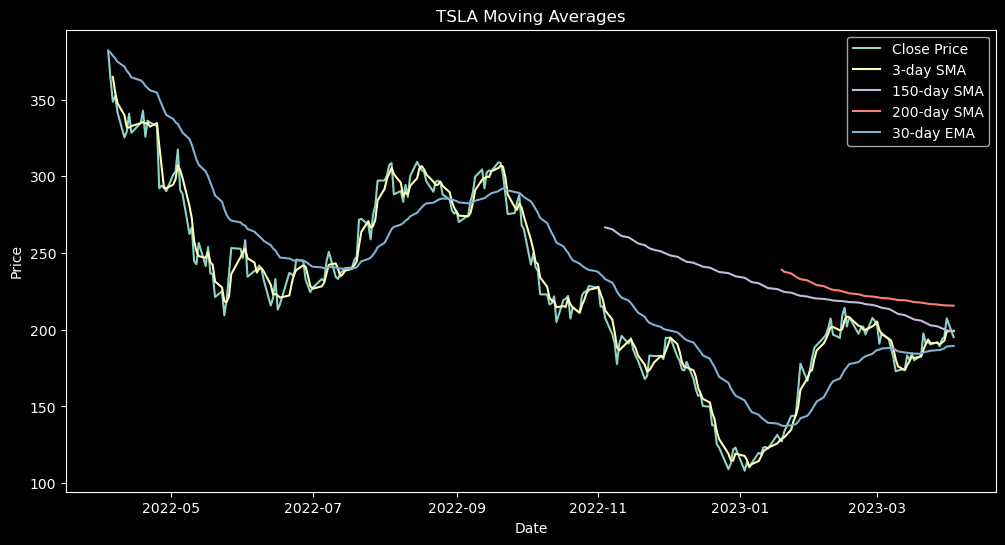

In [65]:
ma = MovingAverage('TSLA')
ma.plot_moving_averages('2022-04-03', [3, 150, 200])


In [71]:
class StockMovingAverageShort:
    def __init__(self, ticker):
        self.ticker = ticker
        self.stock = yf.Ticker(ticker).history(period="max")
        self.stock['Price_shift_1'] = self.stock['Close'].shift(-1)
        self.stock['Price_Difference'] = self.stock["Price_shift_1"] - self.stock['Close']
        self.stock['Return'] = self.stock['Price_Difference'] / self.stock['Close']
        self.stock['Direction'] = np.where(self.stock['Price_Difference'] > 0, 1, -1)
        
    def exponential_moving_average(self, start_date):
        end_date = dt.datetime.today().strftime('%Y-%m-%d')
        ema = self.stock.loc[start_date:end_date, 'Close'].ewm(span=20, adjust=False).mean()
        return ema
        
    def simple_moving_average(self, start_date, window_size):
        end_date = dt.datetime.today().strftime('%Y-%m-%d')
        ma = self.stock.loc[start_date:end_date, 'Close'].rolling(window=window_size).mean()
        return ma
        
    def moving_averages(self, start_date, ma_list):
        end_date = dt.datetime.today().strftime('%Y-%m-%d')
        ma_dict = {}
        for ma in ma_list:
            ma_dict[ma] = self.stock.loc[start_date:end_date, 'Close'].rolling(window=ma).mean()
        return ma_dict


In [68]:
obj = StockMovingAverageShort("TSLA").moving_average("TSLA")

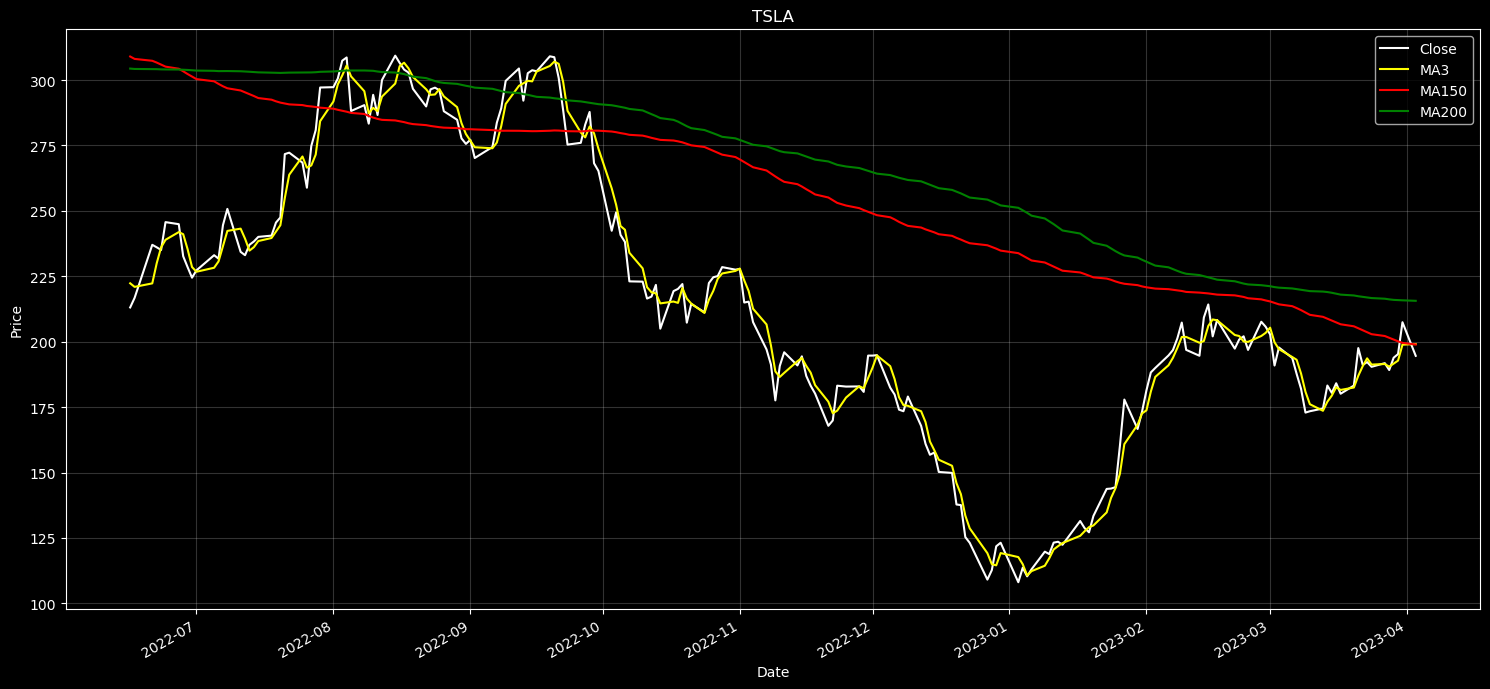

In [73]:
fig, ax = plt.subplots(figsize=(15, 7))
obj['Close'].tail(200).plot(label='Close', ax=ax, color="white")
obj['3-Day_Moving_Average'].tail(200).plot(label='MA3', ax=ax, color="yellow")
obj['150-Day_Moving_Average'].tail(200).plot(label='MA150', ax=ax, color="red")
obj['200-Day_Moving_Average'].tail(200).plot(label='MA200', ax=ax, color="green")
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('TSLA')
ax.legend()
ax.grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

# Returns

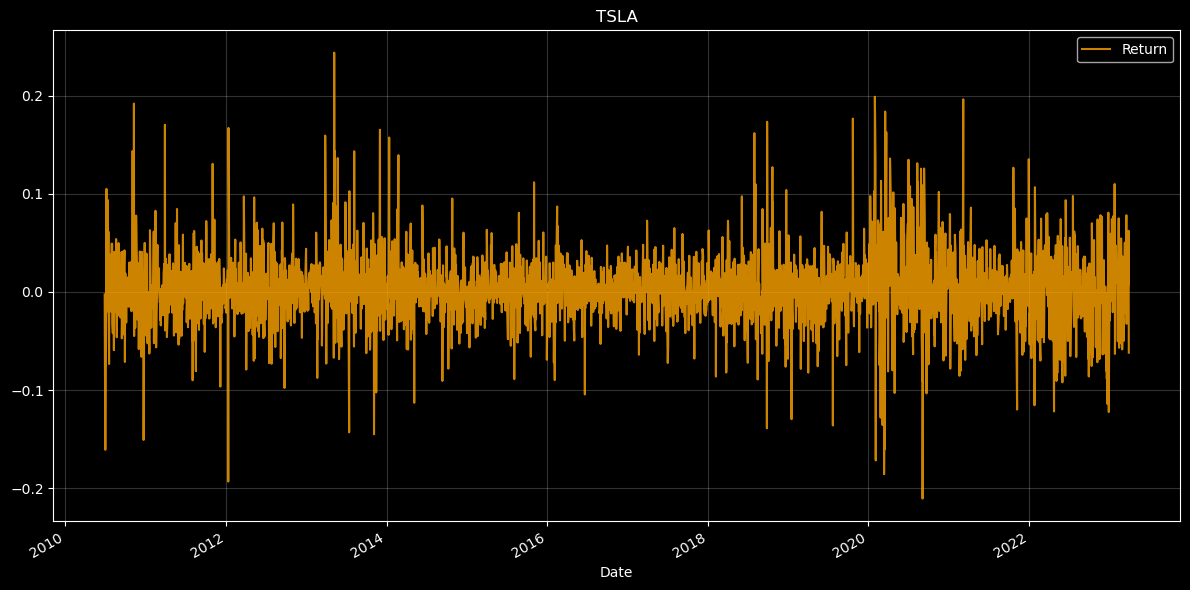

In [74]:
fig, ax = plt.subplots(figsize=(12, 6))
obj.Return.plot(color="orange", alpha=0.80)
ax.set_xlabel('Date')
ax.set_title('TSLA')
ax.legend()
ax.grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

3 year time series Analysis

In [75]:
tsla = yf.Ticker("TSLA")
data = tsla.history(period = "5y")

# Data preparation 

In [82]:
data['Date_ordinal'] = [datetime.toordinal(d) for d in data.index]
X_train, X_test, y_train, y_test = train_test_split(data['Date_ordinal'].values.reshape(-1, 1), data['Close'], test_size=0.2, random_state=42)


In [83]:
 # Create a linear regression model
model = LinearRegression()

In [84]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [85]:
 # Predict the values
y_pred = model.predict(X_test)

In [92]:
import numpy as np
from datetime import datetime

X_test = np.array(X_test)
X_test = [datetime.strptime(d, '%Y-%m-%d').strftime('%Y-%m-%d') for d in X_test.flatten()]


In [143]:
model.coef_

array([0.18239497])

In [144]:
model.intercept_

-134421.7154796789

In [156]:
X_test = X_test.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

plt.style.use('dark_background')
plt.figure(figsize=(20,10))
sns.scatterplot(x=X_test[:, 0], y=y_test[:, 0], label='Actual', color='white')
plt.plot(X_test, y_pred, label='Predicted', color='red')
plt.title('Linear Regression Model - 3 year chart', fontsize=30, color="blue", fontweight='bold')
plt.xlabel('Year', fontsize=20, color='white')
plt.ylabel('Price in USD', fontsize=20, color='white')
plt.legend(prop={'size': 20})
plt.show()


ValueError: All arrays must be of the same length

<Figure size 2000x1000 with 0 Axes>

In [146]:
df = df.reset_index()

In [147]:
print(df.columns)

Index(['index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [148]:
df = yf.download(ticker, start=start_date, end=end_date).reset_index()
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:>

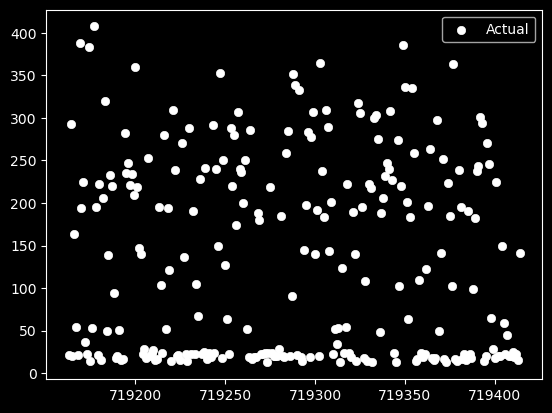

In [158]:
X_test = pd.Series(X_test[:, 0])
y_test = pd.Series(y_test[:, 0])
sns.scatterplot(x=X_test, y=y_test, label='Actual', color='white')


In [157]:
print(X_test.shape, y_test.shape)

(756, 1) (252, 1)


In [160]:
print(len(X_test), len(y))

756 756


[*********************100%***********************]  1 of 1 completed


AttributeError: 'Series' object has no attribute 'reshape'

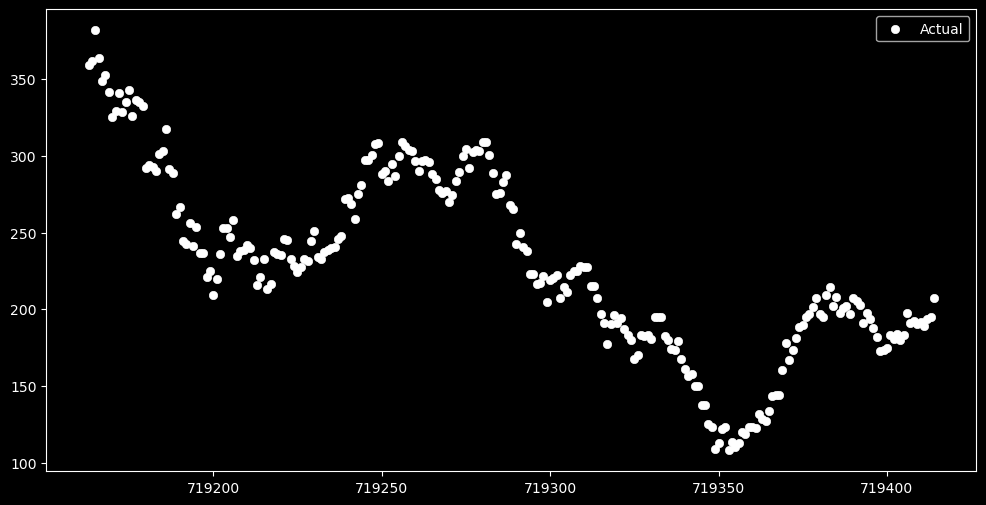

In [168]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

ticker = 'TSLA'
start_date = '2018-04-01'
end_date = '2023-04-01'

df = yf.download(ticker, start=start_date, end=end_date).reset_index()
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

data = df[['Date', 'Adj Close']]
data.set_index('Date', inplace=True)

train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size, :], data.iloc[train_size:, :]

X_train = pd.to_datetime(train_data.index).to_series().apply(lambda x: x.toordinal()).values.reshape(-1, 1)
y_train = train_data['Adj Close'].values.reshape(-1, 1)

X_test = pd.to_datetime(test_data.index).to_series().apply(lambda x: x.toordinal()).values.reshape(-1, 1)
y_test = test_data['Adj Close'].values.reshape(-1, 1)

X_test = np.reshape(X_test, (-1,))

X = pd.to_datetime(data.index).to_series().apply(lambda x: x.toordinal()).values.reshape(-1, 1)
y = data['Adj Close'].values.reshape(-1, 1)

X_test = pd.date_range(start=X.min(), periods=len(y), freq='D').to_series().apply(lambda x: x.toordinal()).values.reshape(-1, 1)
y_pred = LinearRegression().fit(X, y).predict(X_test)

X_test = pd.Series(X_test[:, 0])
y_test = pd.Series(y_test[:, 0])

plt.style.use('dark_background')
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_test, y=y_test, label='Actual', color='white')

plt.plot(pd.to_datetime(X_test.reshape(1, -1)[0]), y_pred, color='blue')
plt.plot(pd.to_datetime(X.reshape(1, -1)[0]), y, color='orange')
plt.title(f'{ticker} Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [166]:
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LinearRegression
from datetime import datetime

# get historical data for desired stock
ticker = "TSLA"
start_date = "2018-04-01"
end_date = datetime.today().strftime('%Y-%m-%d')
data = yf.download(ticker, start=start_date, end=end_date)

# add Date_ordinal column to data
data = data.reset_index()
data['Date_ordinal'] = data['Date'].apply(lambda x: x.toordinal())

# split data into training and test sets
train_data = data[data['Date'] < datetime(2021, 1, 1)]
test_data = data[data['Date'] >= datetime(2021, 1, 1)]

# train linear regression model on training data
regressor = LinearRegression()
regressor.fit(train_data['Date_ordinal'].values.reshape(-1, 1), train_data['Adj Close'].values.reshape(-1, 1))

# predict on test data
predictions = regressor.predict(test_data['Date_ordinal'].values.reshape(-1, 1))

# print results
for i in range(len(predictions)):
    print("Predicted price on " + str(test_data.iloc[i]['Date']) + " is " + str(predictions[i][0]) + ", actual price is " + str(test_data.iloc[i]['Adj Close']))


[*********************100%***********************]  1 of 1 completed
Predicted price on 2021-01-04 00:00:00 is 112.89115642527759, actual price is 243.2566680908203
Predicted price on 2021-01-05 00:00:00 is 113.02028092379624, actual price is 245.0366668701172
Predicted price on 2021-01-06 00:00:00 is 113.14940542232944, actual price is 251.9933319091797
Predicted price on 2021-01-07 00:00:00 is 113.27852992086264, actual price is 272.0133361816406
Predicted price on 2021-01-08 00:00:00 is 113.40765441938129, actual price is 293.3399963378906
Predicted price on 2021-01-11 00:00:00 is 113.79502791496634, actual price is 270.39666748046875
Predicted price on 2021-01-12 00:00:00 is 113.92415241349954, actual price is 283.14666748046875
Predicted price on 2021-01-13 00:00:00 is 114.05327691203274, actual price is 284.8033447265625
Predicted price on 2021-01-14 00:00:00 is 114.18240141056594, actual price is 281.6666564941406
Predicted price on 2021-01-15 00:00:00 is 114.3115259090846, actu